# Ensemble Methods for Termite Data Analysis

This notebook explores the application of ensemble learning methods to predict termite discovery and wood characteristics using a comprehensive dataset. Ensemble methods improve prediction accuracy by combining multiple models. We'll focus on two popular methods: Random Forest and Gradient Boosting.


## Load and Preprocess Data

We start by loading our dataset and conducting necessary preprocessing steps such as handling missing values, encoding categorical features, and splitting data into training and testing sets.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer  # Corrected import for SimpleImputer
import matplotlib.pyplot as plt

# Load and clean the data
data = pd.read_csv('../../global_termite_microbe_wd.csv')  # Adjust the path as needed

data['deployment_date'] = pd.to_datetime(data['deployment_date'])
data['harvest_date'] = pd.to_datetime(data['harvest_date'], format='%Y-%m-%dT%H:%M:%SZ')
data['deployment_duration'] = (data['harvest_date'] - data['deployment_date']).dt.days

# Drop rows with missing target values
data_cleaned = data.dropna(subset=['termite_discovery', 'final_wt'])

# Prepare column transformer for categorical encoding
categorical_cols = ['country', 'site', 'habitat_type', 'wood_used', 'wood_origin', 'treatment']
numerical_cols = ['latitude', 'longitude', 'N_pc', 'C_pc', 'P_pc', 'initial_wt', 'k_value', 'deployment_duration']

# Pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Split the data into features and target arrays
X = data_cleaned.drop(['termite_discovery', 'final_wt'], axis=1)
y_class = data_cleaned['termite_discovery']
y_regress = data_cleaned['final_wt']

# Split the data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_regress, X_test_regress, y_train_regress, y_test_regress = train_test_split(X, y_regress, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_class_prepared = preprocessor.fit_transform(X_train_class)
X_test_class_prepared = preprocessor.transform(X_test_class)
X_train_regress_prepared = preprocessor.fit_transform(X_train_regress)
X_test_regress_prepared = preprocessor.transform(X_test_regress)

## Training Ensemble Models

We will now use Random Forest and Gradient Boosting models to address our classification and regression tasks. These ensemble methods are known for their robustness and ability to improve prediction accuracy by reducing variance (Random Forest) and bias (Gradient Boosting).


## Random Forest Models

Random Forest is an ensemble learning method that builds several decision trees and merges them together to get a more accurate and stable prediction. It is effective for both classification and regression tasks.


In [5]:
# Building and training the random forest models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class_prepared, y_train_class)  # Use preprocessed data

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_regress_prepared, y_train_regress)  # Use preprocessed data

# Predicting and evaluating the classifier using the preprocessed test data
y_pred_rf_class = rf_classifier.predict(X_test_class_prepared)  # Use preprocessed data
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_class, y_pred_rf_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_rf_class))

# Predicting and evaluating the regressor using the preprocessed test data
y_pred_rf_regress = rf_regressor.predict(X_test_regress_prepared)  # Use preprocessed data
print("Random Forest Regressor R² Score:", r2_score(y_test_regress, y_pred_rf_regress))

Random Forest Classifier Accuracy: 0.9276061776061776

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1792
         1.0       0.78      0.65      0.71       280

    accuracy                           0.93      2072
   macro avg       0.86      0.81      0.83      2072
weighted avg       0.92      0.93      0.92      2072

Random Forest Regressor R² Score: 0.996325508314323


## Gradient Boosting Models

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions, making it highly flexible and powerful for both regression and classification tasks.

In [8]:
# Building and training gradient boosting models
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train_class_prepared, y_train_class)

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train_regress_prepared, y_train_regress)

# Predicting and evaluating the classifier
y_pred_gb_class = gb_classifier.predict(X_test_class_prepared)
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test_class, y_pred_gb_class))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_gb_class))

# Predicting and evaluating the regressor
y_pred_gb_regress = gb_regressor.predict(X_test_regress_prepared)
print("Gradient Boosting Regressor R² Score:", r2_score(y_test_regress, y_pred_gb_regress))

Gradient Boosting Classifier Accuracy: 0.9266409266409267

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1792
         1.0       0.82      0.59      0.68       280

    accuracy                           0.93      2072
   macro avg       0.88      0.78      0.82      2072
weighted avg       0.92      0.93      0.92      2072

Gradient Boosting Regressor R² Score: 0.9947401085613596


## Visualizing Model Insights and Comparisons

Visualizations play a crucial role in understanding and interpreting the behavior and performance of machine learning models. In this section, we delve into various visual representations to extract and illustrate meaningful insights from our ensemble models.

### Why Visualize?
- **Enhance Understanding**: Graphical representations allow us to quickly grasp complex patterns that might be difficult to understand through raw numbers alone.
- **Identify Trends**: By visualizing model outputs and metrics, we can identify trends and anomalies that may inform further model refinement and hypothesis generation.
- **Communicate Findings**: Visuals are an effective way to communicate findings clearly and persuasively to both technical and non-technical audiences, making them essential for reporting.

### What We'll Visualize
1. **Feature Importance**: We'll start by exploring which features have the most significant impact on our models' predictions. This will help us understand the driving factors behind the models' decisions.
2. **Model Performance Comparison**: Next, we compare the performance of different ensemble models across various metrics using comparative charts. This will highlight which models excel in specific aspects of the tasks.
3. **Confusion Matrices**: For our classification tasks, we'll visualize confusion matrices to evaluate the accuracy of predictions across different classes and identify any prevalent biases in model predictions.

These visualizations will not only aid in better understanding our models but also in refining them and explaining their outcomes to stakeholders.


## Feature Importance Visualization

Understanding which features significantly influence the predictions of our models can provide insights into the dataset and the model's decision-making process. Both Random Forest and Gradient Boosting algorithms provide a way to evaluate the importance of each feature in making predictions. Below, we visualize the feature importances for our classifiers and regressors. This helps us identify the most influential factors in predicting termite discovery and wood final weight.

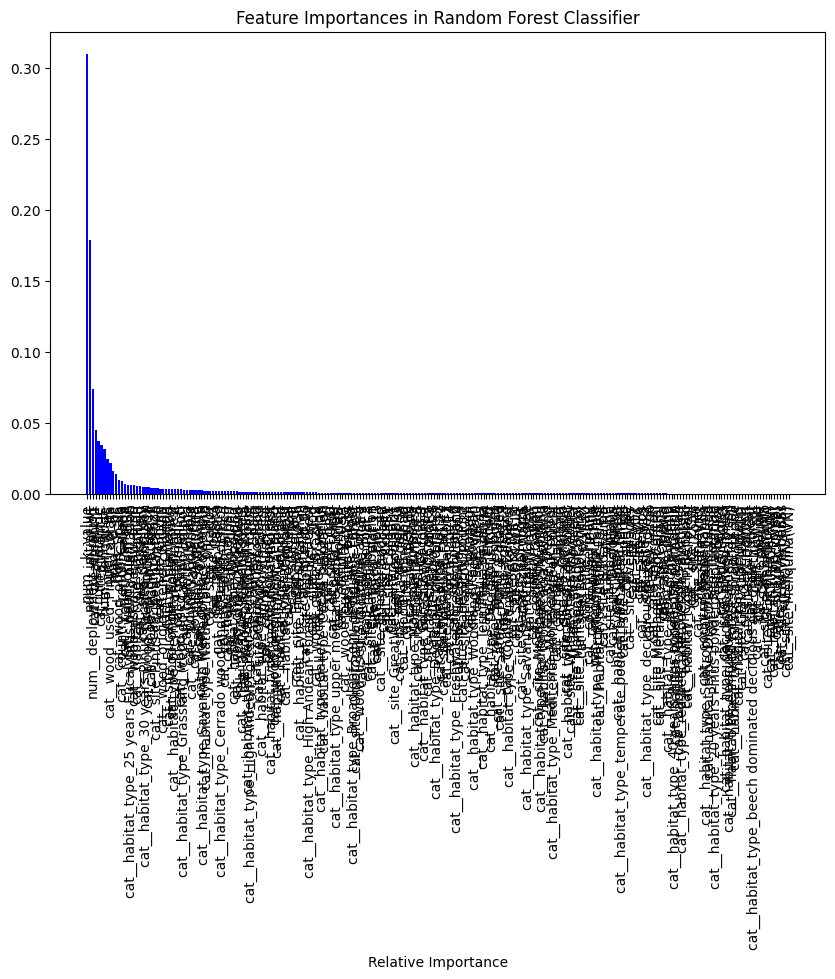

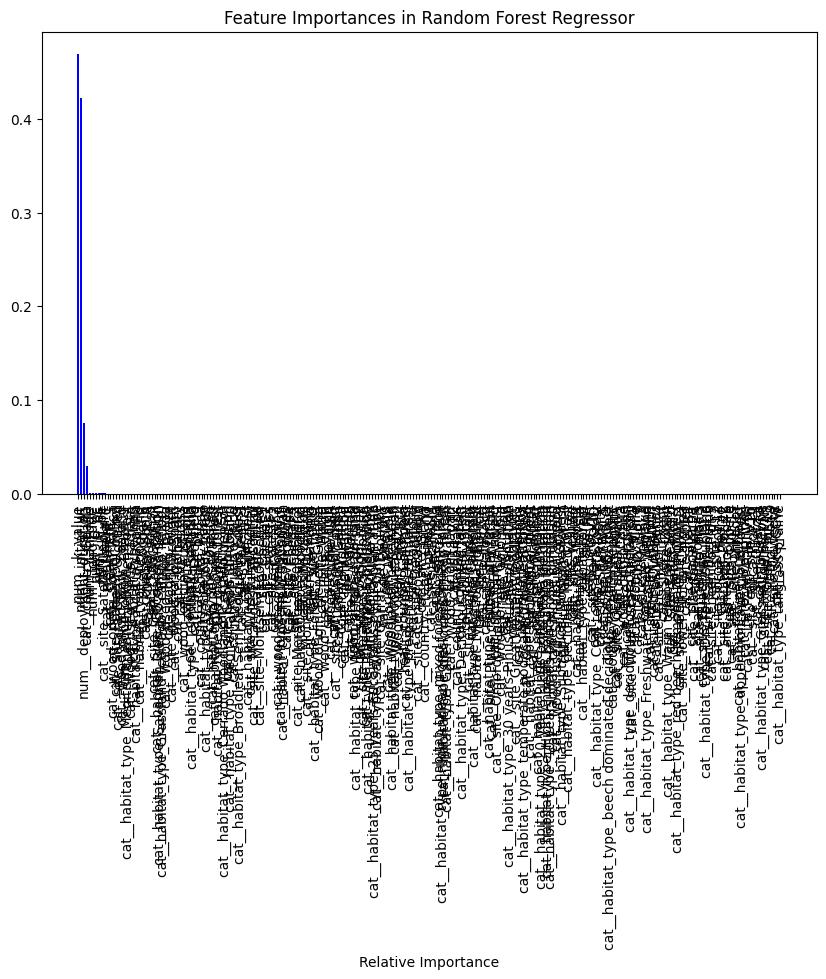

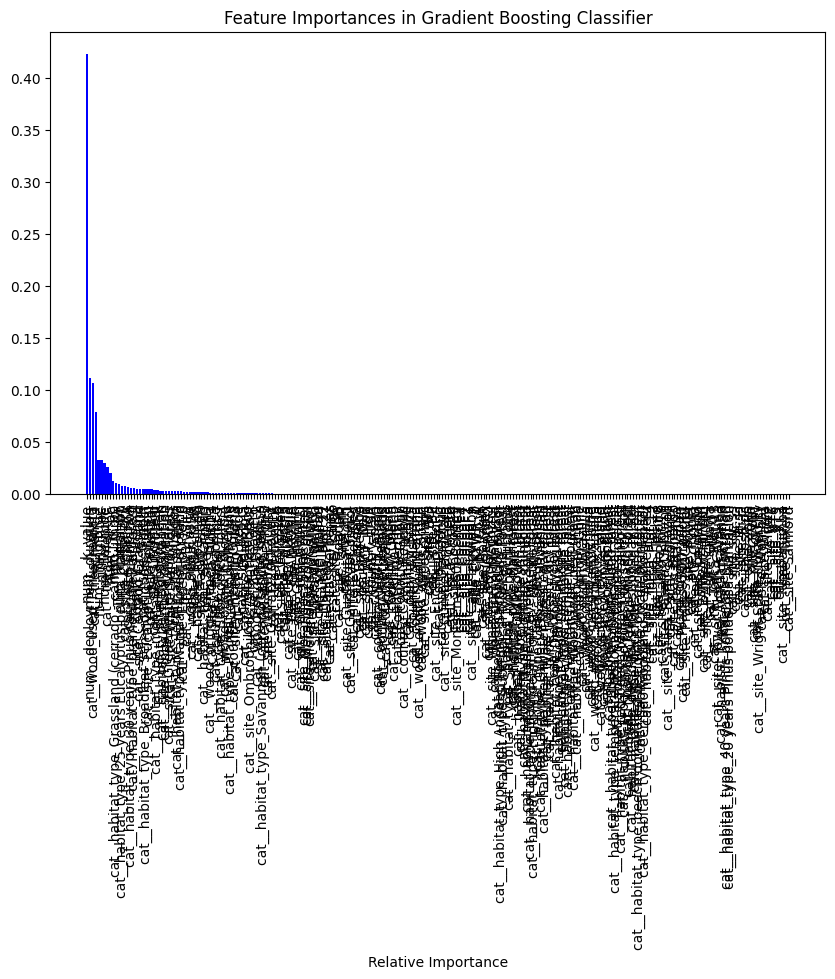

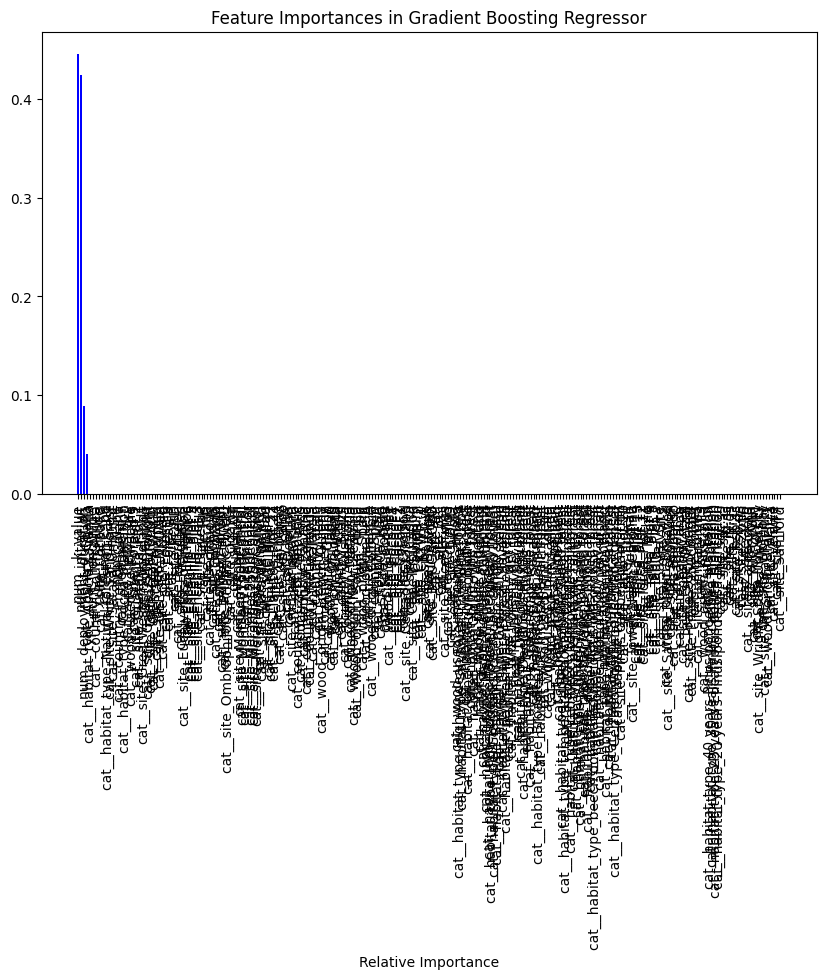

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importance(model, features, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importances in {model_name}')
    plt.bar(range(len(indices)), importances[indices], color='b', align='center')
    plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
    plt.xlabel('Relative Importance')
    plt.show()

# Plotting feature importance for RandomForest and GradientBoosting
plot_feature_importance(rf_classifier, preprocessor.get_feature_names_out(), 'Random Forest Classifier')
plot_feature_importance(rf_regressor, preprocessor.get_feature_names_out(), 'Random Forest Regressor')
plot_feature_importance(gb_classifier, preprocessor.get_feature_names_out(), 'Gradient Boosting Classifier')
plot_feature_importance(gb_regressor, preprocessor.get_feature_names_out(), 'Gradient Boosting Regressor')


## Visualizing Top Feature Importances

To gain a clearer understanding of what drives our models' predictions, we focus on the top most impactful features. This approach simplifies our visualization and emphasizes the features that contribute the most to the models' decision-making processes. Below, we visualize the top 10 features for our classifiers and the top 5 for our regressors, providing a concise view of the most critical factors in our dataset.


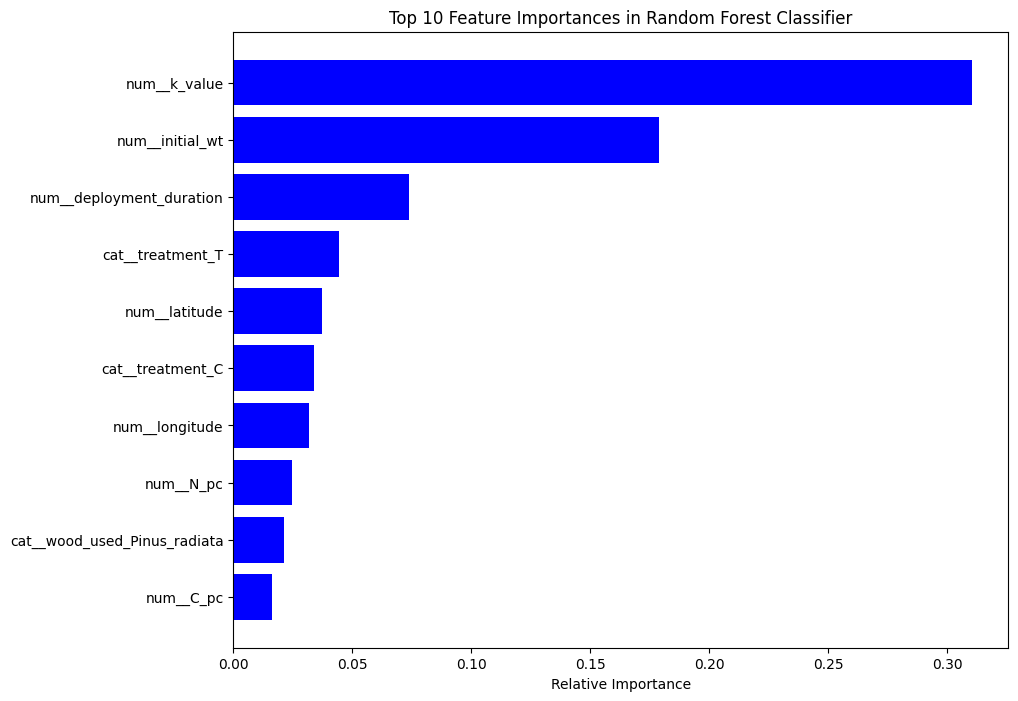

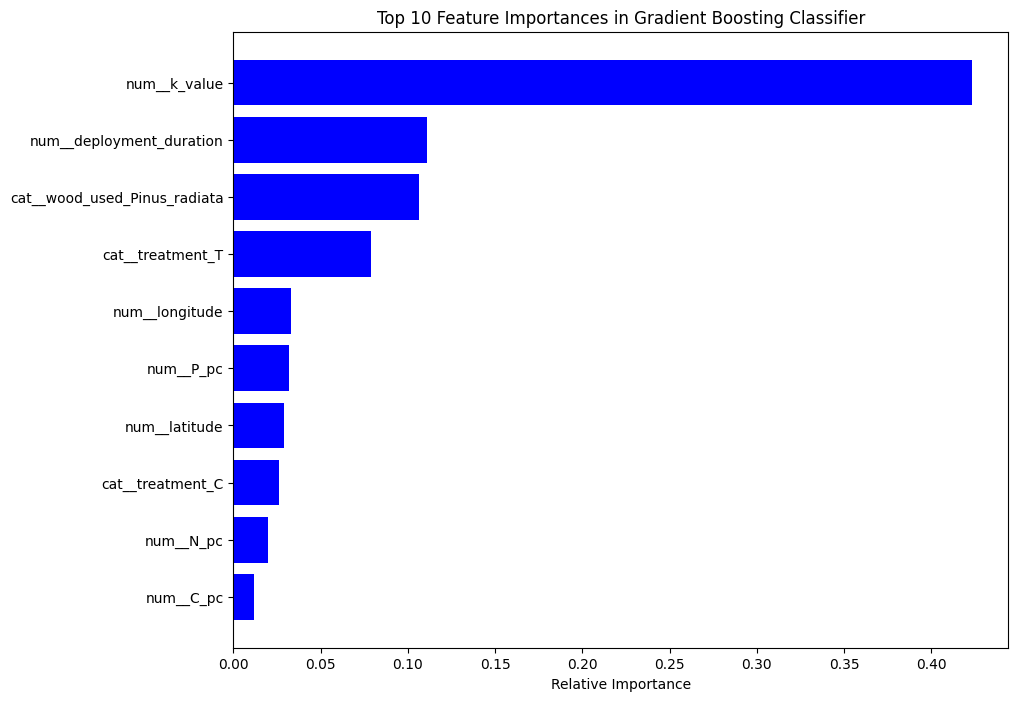

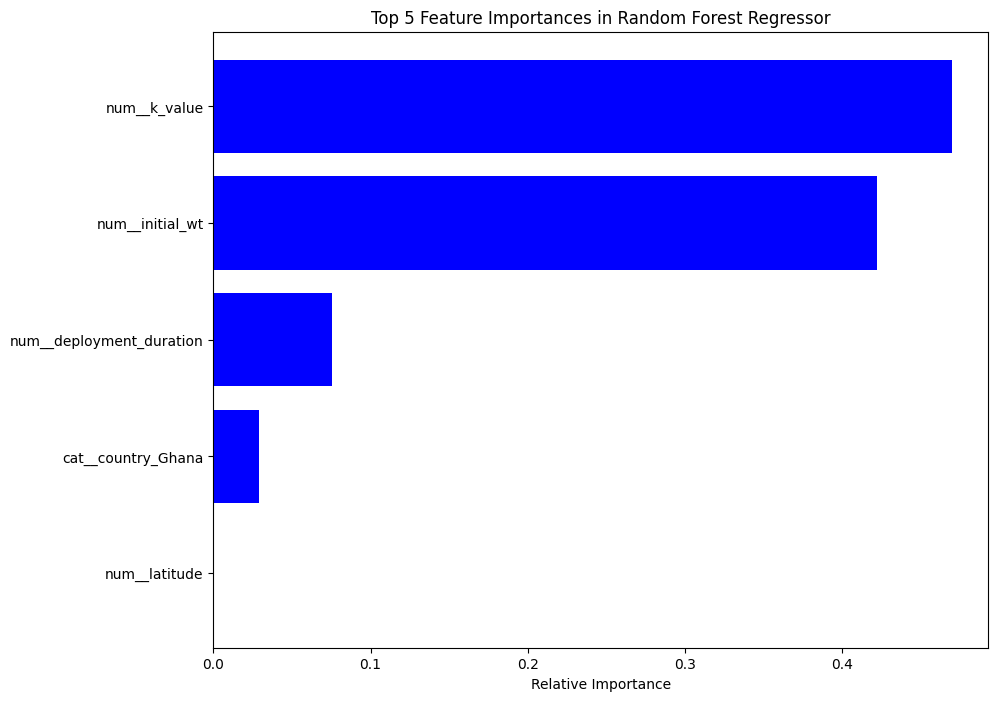

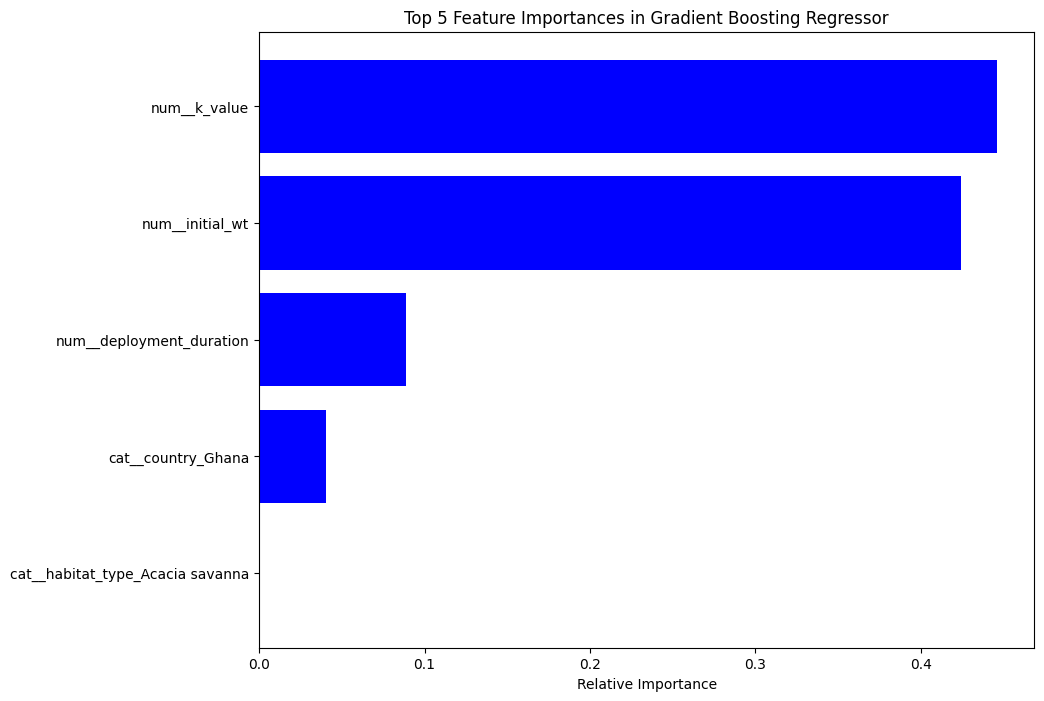

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_top_feature_importances(model, features, model_name, top_n=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]  # Get the indices of top features

    plt.figure(figsize=(10, 8))
    plt.title(f'Top {top_n} Feature Importances in {model_name}')
    plt.barh(range(top_n), importances[indices], color='b', align='center')
    plt.yticks(range(top_n), np.array(features)[indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Example usage for RandomForest and GradientBoosting
plot_top_feature_importances(rf_classifier, preprocessor.get_feature_names_out(), 'Random Forest Classifier', top_n=10)
plot_top_feature_importances(gb_classifier, preprocessor.get_feature_names_out(), 'Gradient Boosting Classifier', top_n=10)
plot_top_feature_importances(rf_regressor, preprocessor.get_feature_names_out(), 'Random Forest Regressor', top_n=5)
plot_top_feature_importances(gb_regressor, preprocessor.get_feature_names_out(), 'Gradient Boosting Regressor', top_n=5)


## Model Comparison Charts

Comparing the performance of different ensemble models helps us understand their strengths and weaknesses in various aspects of the tasks at hand. Here, we compare the accuracy and R² scores of the Random Forest and Gradient Boosting models using bar charts. This visualization will highlight which model performs better in terms of accuracy for classification and how well each model explains the variance in our regression task.


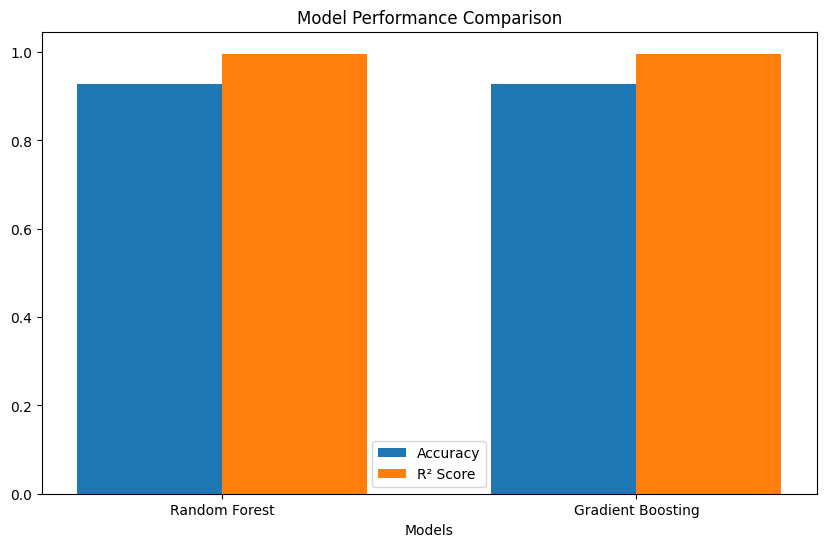

In [14]:
def compare_models_performance(accuracy_rf, accuracy_gb, r2_rf, r2_gb):
    labels = ['Random Forest', 'Gradient Boosting']
    accuracy_scores = [accuracy_rf, accuracy_gb]
    r2_scores = [r2_rf, r2_gb]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
    rects2 = ax.bar(x + width/2, r2_scores, width, label='R² Score')

    ax.set_xlabel('Models')
    ax.set_title('Model Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Example usage
compare_models_performance(
    accuracy_score(y_test_class, y_pred_rf_class),
    accuracy_score(y_test_class, y_pred_gb_class),
    r2_score(y_test_regress, y_pred_rf_regress),
    r2_score(y_test_regress, y_pred_gb_regress)
)


## Confusion Matrix Visualization

For classification tasks, the confusion matrix is a critical diagnostic tool. It provides a visual summary of the performance metrics and shows the types of errors made by the model. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. This visualization is particularly useful for seeing how well the model is predicting each class and identifying any biases towards particular classes.


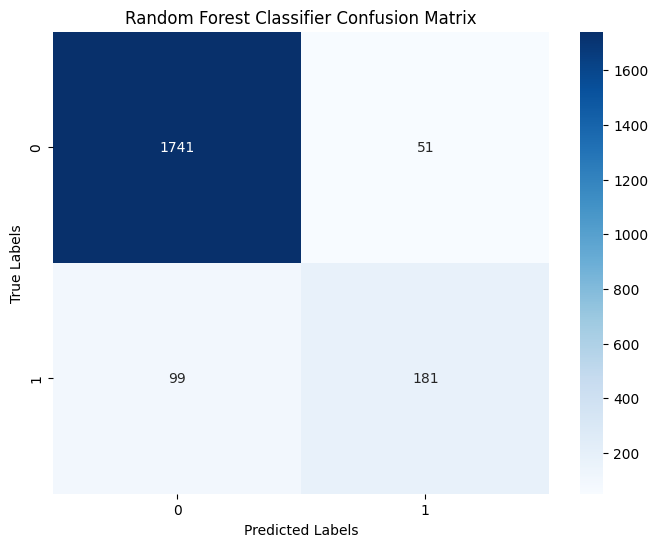

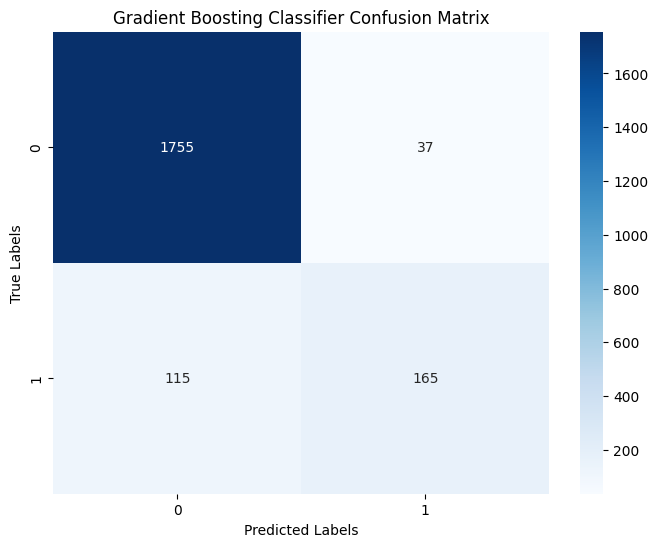

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plotting confusion matrix for the classifiers
plot_confusion_matrix(y_test_class, y_pred_rf_class, 'Random Forest Classifier Confusion Matrix')
plot_confusion_matrix(y_test_class, y_pred_gb_class, 'Gradient Boosting Classifier Confusion Matrix')


## Conclusion

In this notebook, we explored two powerful ensemble methods and applied them to both classification and regression tasks. The use of ensemble methods like Random Forest and Gradient Boosting has shown to improve model accuracy and robustness significantly compared to single models.
